In [3]:
# Assignment 03
# Brendan Dasilva
# 101447806

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [5]:
# 1) IMPORT THE DATA

df = pd.read_csv('train.csv', keep_default_na=False)
# prevents NA to be read as NaN (missing value) 
# for categorical data NA is a valid value -> because it just refers to E.g No Alley
# so NA is read as NA not as NaN
df_test = pd.read_csv('test.csv', keep_default_na=False)

In [6]:
df.shape

(1460, 81)

In [7]:
# Preview the data
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,12,2008,WD,Normal,250000


In [8]:
df_test.shape
# the test data has no target variable - the SalePrice column - so there is one less column

(1459, 80)

In [9]:
# Preview the test data
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80,11622,Pave,NA,Reg,Lvl,AllPub,...,120,0,NA,MnPrv,NA,0,6,2010,WD,Normal
1,1462,20,RL,81,14267,Pave,NA,IR1,Lvl,AllPub,...,0,0,NA,NA,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74,13830,Pave,NA,IR1,Lvl,AllPub,...,0,0,NA,MnPrv,NA,0,3,2010,WD,Normal
3,1464,60,RL,78,9978,Pave,NA,IR1,Lvl,AllPub,...,0,0,NA,NA,NA,0,6,2010,WD,Normal
4,1465,120,RL,43,5005,Pave,NA,IR1,HLS,AllPub,...,144,0,NA,NA,NA,0,1,2010,WD,Normal


In [10]:
# Check to make sure the columns with missing values have been dropped (before object conversion)
df.isnull().sum().sort_values(ascending=False)

Id             0
CentralAir     0
GarageYrBlt    0
GarageType     0
FireplaceQu    0
              ..
MasVnrArea     0
MasVnrType     0
Exterior2nd    0
Exterior1st    0
SalePrice      0
Length: 81, dtype: int64

In [11]:
# Summary of the dataframe
# Identify total number of rows, the column names and the different data types used in the sample
# Also counts the non-null to help identify columns with missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotFrontage    1460 non-null   object
 4   LotArea        1460 non-null   int64 
 5   Street         1460 non-null   object
 6   Alley          1460 non-null   object
 7   LotShape       1460 non-null   object
 8   LandContour    1460 non-null   object
 9   Utilities      1460 non-null   object
 10  LotConfig      1460 non-null   object
 11  LandSlope      1460 non-null   object
 12  Neighborhood   1460 non-null   object
 13  Condition1     1460 non-null   object
 14  Condition2     1460 non-null   object
 15  BldgType       1460 non-null   object
 16  HouseStyle     1460 non-null   object
 17  OverallQual    1460 non-null   int64 
 18  OverallCond    1460 non-null

In [12]:
# Quick summary of the stats for numeric columns in the dataframe
# Helpful for spotting outliers and unexpected values
df.describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,443.639726,46.549315,567.240411,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,456.098091,161.319273,441.866955,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,383.500000,0.000000,477.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,712.250000,0.000000,808.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,1474.000000,2336.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [13]:
# 2) DATA PROCESSING

In [14]:
print(df.dtypes)

Id                int64
MSSubClass        int64
MSZoning         object
LotFrontage      object
LotArea           int64
                  ...  
MoSold            int64
YrSold            int64
SaleType         object
SaleCondition    object
SalePrice         int64
Length: 81, dtype: object


In [15]:
# Going over the types we can identify 2 that should be changed from object to int
# And 3 that can be used to create more useful columns:
#     We can create GarageAge by taking the current year and subtracting the year the garage was built - this is more useful
#     We can also take the year it was sold and subtract the year it was built to create an age column which is a better representation
#     Columns created: GarageAge and Age
#     Columns to be dropped after: GarageYrBlt, YrSold and YearBuilt

# Conversion for df
df['LotFrontage'] = pd.to_numeric(df['LotFrontage'], errors='coerce')
df['MasVnrArea'] = pd.to_numeric(df['MasVnrArea'], errors='coerce')

In [16]:
# Conversion for df_test
df_test['LotFrontage'] = pd.to_numeric(df['LotFrontage'], errors='coerce')
df_test['MasVnrArea'] = pd.to_numeric(df['MasVnrArea'], errors='coerce')

In [17]:
set(df.dtypes) # confirmed that the two above data has been changed to int or float format

{dtype('int64'), dtype('float64'), dtype('O')}

In [18]:
# Now that LotFrontage and MasVnrArea have been converted we can see which other columns have to have their null rows dropped or replaced
# Therefore we see we still need to clean up LotFrontage column and MasVnrArea column
df.isnull().sum().sort_values(ascending=False)

LotFrontage     259
MasVnrArea        8
Id                0
KitchenAbvGr      0
GarageYrBlt       0
               ... 
ExterQual         0
MasVnrType        0
Exterior2nd       0
Exterior1st       0
SalePrice         0
Length: 81, dtype: int64

In [19]:
# Same thing for the df_test
df_test.isnull().sum().sort_values(ascending=False)

LotFrontage      259
MasVnrArea         8
Id                 0
BedroomAbvGr       0
GarageType         0
                ... 
ExterQual          0
MasVnrType         0
Exterior2nd        0
Exterior1st        0
SaleCondition      0
Length: 80, dtype: int64

In [20]:
# Replacing missing values in the above two columns by their means for both df and df_test
replacement = {
    'LotFrontage': df['LotFrontage'].mean(), 
    'MasVnrArea': df['MasVnrArea'].mean()
}
df.fillna(replacement, inplace=True)
df_test.fillna(replacement, inplace=True)

In [21]:
# Confirm null values have been replaced for df
df.isnull().sum().sort_values(ascending=False)

Id             0
CentralAir     0
GarageYrBlt    0
GarageType     0
FireplaceQu    0
              ..
MasVnrArea     0
MasVnrType     0
Exterior2nd    0
Exterior1st    0
SalePrice      0
Length: 81, dtype: int64

In [22]:
# Confirm null values have been replaced for df_test
df.isnull().sum().sort_values(ascending=False)

Id             0
CentralAir     0
GarageYrBlt    0
GarageType     0
FireplaceQu    0
              ..
MasVnrArea     0
MasVnrType     0
Exterior2nd    0
Exterior1st    0
SalePrice      0
Length: 81, dtype: int64

In [23]:
# FEATURE ENGINEERING

In [24]:
# Create new column for the age of the house
df['Age'] = df['YrSold'] - df['YearBuilt']
# Drop the two columns from which we created new one
df.drop(['YrSold', 'YearBuilt'], axis=1, inplace=True)
# View the dataframe again
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,Age
0,1,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,2,WD,Normal,208500,5
1,2,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,5,WD,Normal,181500,31
2,3,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,9,WD,Normal,223500,7
3,4,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,2,WD,Abnorml,140000,91
4,5,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,12,WD,Normal,250000,8


In [25]:
# Same thing for df_test
df_test["Age"] = df_test["YrSold"] - df_test["YearBuilt"]
# Syntax check for required params: axis {o or 'index', 1 or 'columns'}, default 0
df_test.drop(["YrSold", "YearBuilt"], axis=1, inplace=True)
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,Age
0,1461,20,RH,65.0,11622,Pave,NA,Reg,Lvl,AllPub,...,120,0,NA,MnPrv,NA,0,6,WD,Normal,49
1,1462,20,RL,80.0,14267,Pave,NA,IR1,Lvl,AllPub,...,0,0,NA,NA,Gar2,12500,6,WD,Normal,52
2,1463,60,RL,68.0,13830,Pave,NA,IR1,Lvl,AllPub,...,0,0,NA,MnPrv,NA,0,3,WD,Normal,13
3,1464,60,RL,60.0,9978,Pave,NA,IR1,Lvl,AllPub,...,0,0,NA,NA,NA,0,6,WD,Normal,12
4,1465,120,RL,84.0,5005,Pave,NA,IR1,HLS,AllPub,...,144,0,NA,NA,NA,0,1,WD,Normal,18


In [26]:
# Calculate GarageAge by subtracting the year the garage was built from the current year

# Convert GarageYrBlt to numeric and coerce errors to NaN
df['GarageYrBlt'] = pd.to_numeric(df['GarageYrBlt'], errors='coerce')
df_test['GarageYrBlt'] = pd.to_numeric(df_test['GarageYrBlt'], errors='coerce')

# Get the current year
current_year = datetime.now().year

# Calculate GarageAge, handling NaN values by setting them to 0 after calculation
df['GarageAge'] = current_year - df['GarageYrBlt']
df['GarageAge'] = df['GarageAge'].fillna(0)  # Set NA ages to 0, implying no garage

df_test['GarageAge'] = current_year - df_test['GarageYrBlt']
df_test['GarageAge'] = df_test['GarageAge'].fillna(0)

# Drop the original GarageYrBlt column
df.drop(columns=['GarageYrBlt'], inplace=True)
df_test.drop(columns=['GarageYrBlt'], inplace=True)

In [27]:
# Display the first few rows of the updated df
print(df[['GarageAge']].head())  # Shows the new GarageAge column
print(df.head())  # Shows the full dataframe to confirm GarageYearBuilt is dropped

   GarageAge
0       21.0
1       48.0
2       23.0
3       26.0
4       24.0
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave    NA      Reg   
1   2          20       RL         80.0     9600   Pave    NA      Reg   
2   3          60       RL         68.0    11250   Pave    NA      IR1   
3   4          70       RL         60.0     9550   Pave    NA      IR1   
4   5          60       RL         84.0    14260   Pave    NA      IR1   

  LandContour Utilities  ... PoolQC Fence MiscFeature MiscVal MoSold SaleType  \
0         Lvl    AllPub  ...     NA    NA          NA       0      2       WD   
1         Lvl    AllPub  ...     NA    NA          NA       0      5       WD   
2         Lvl    AllPub  ...     NA    NA          NA       0      9       WD   
3         Lvl    AllPub  ...     NA    NA          NA       0      2       WD   
4         Lvl    AllPub  ...     NA    NA          NA       0     12    

In [28]:
# Display the first few rows of the updated df_test
print(df_test[['GarageAge']].head())  # Shows the new GarageAge column
print(df_test.head())  # Shows the full dataframe to confirm GarageYearBuilt is dropped

   GarageAge
0       63.0
1       66.0
2       27.0
3       26.0
4       32.0
     Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         65.0    11622   Pave    NA      Reg   
1  1462          20       RL         80.0    14267   Pave    NA      IR1   
2  1463          60       RL         68.0    13830   Pave    NA      IR1   
3  1464          60       RL         60.0     9978   Pave    NA      IR1   
4  1465         120       RL         84.0     5005   Pave    NA      IR1   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0     NA  MnPrv          NA       0   
1         Lvl    AllPub  ...        0     NA     NA        Gar2   12500   
2         Lvl    AllPub  ...        0     NA  MnPrv          NA       0   
3         Lvl    AllPub  ...        0     NA     NA          NA       0   
4         HLS    AllPub  ...        0     NA     NA          NA       0   

  MoSold SaleT

In [29]:
# SalePrice Distribution and Transformation

In [30]:
# SalePrice before transformation
df.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

(array([148., 723., 373., 135.,  51.,  19.,   4.,   3.,   2.,   2.]),
 array([ 34900., 106910., 178920., 250930., 322940., 394950., 466960.,
        538970., 610980., 682990., 755000.]),
 <BarContainer object of 10 artists>)

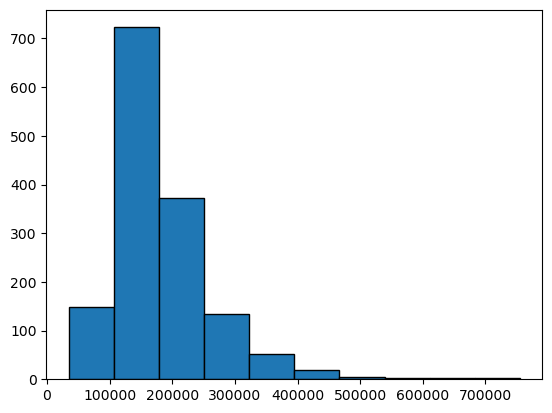

In [31]:
plt.hist(df.SalePrice, edgecolor='black')
# The majority of the data points are concentrated on the left side of the histogram, meaning that the data is skewed.
# To correct this we can log-transform the target variable in order to improve the linearity of the data 

In [32]:
# Transform SalePrice with log for normalization
df['LogPrice'] = np.log(df['SalePrice'])

In [33]:
# Normalized SalePrice
df.LogPrice.describe()

count    1460.000000
mean       12.024051
std         0.399452
min        10.460242
25%        11.775097
50%        12.001505
75%        12.273731
max        13.534473
Name: LogPrice, dtype: float64

(array([  5.,  12.,  54., 184., 470., 400., 220.,  90.,  19.,   6.]),
 array([10.46024211, 10.7676652 , 11.07508829, 11.38251138, 11.68993448,
        11.99735757, 12.30478066, 12.61220375, 12.91962684, 13.22704994,
        13.53447303]),
 <BarContainer object of 10 artists>)

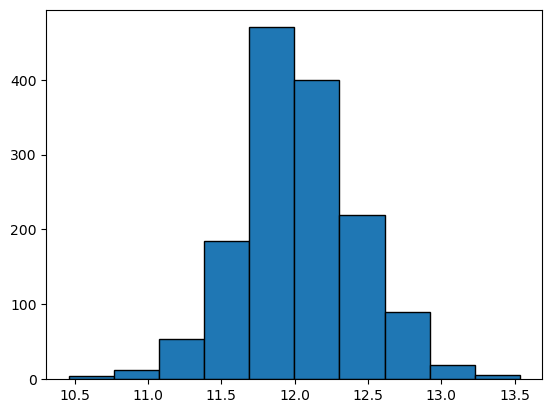

In [34]:
plt.hist(df.LogPrice, edgecolor='black')
# Data has been normalized

In [35]:
# FEATURE SELECTION
# Isolate numeric values for correlation analysis (correlation only applies to numeric values)
# this function selects columns from the df based on data type criteria (int64 and float64 in this case)
df_num= df.select_dtypes(include=['int64', 'float64'])
df_num

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,Age,GarageAge,LogPrice
0,1,60,65.0,8450,7,5,2003,196.0,706,0,...,0,0,0,0,0,2,208500,5,21.0,12.247694
1,2,20,80.0,9600,6,8,1976,0.0,978,0,...,0,0,0,0,0,5,181500,31,48.0,12.109011
2,3,60,68.0,11250,7,5,2002,162.0,486,0,...,0,0,0,0,0,9,223500,7,23.0,12.317167
3,4,70,60.0,9550,7,5,1970,0.0,216,0,...,272,0,0,0,0,2,140000,91,26.0,11.849398
4,5,60,84.0,14260,8,5,2000,350.0,655,0,...,0,0,0,0,0,12,250000,8,24.0,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,2000,0.0,0,0,...,0,0,0,0,0,8,175000,8,25.0,12.072541
1456,1457,20,85.0,13175,6,6,1988,119.0,790,163,...,0,0,0,0,0,2,210000,32,46.0,12.254863
1457,1458,70,66.0,9042,7,9,2006,0.0,275,0,...,0,0,0,0,2500,5,266500,69,83.0,12.493130
1458,1459,20,68.0,9717,5,6,1996,0.0,49,1029,...,112,0,0,0,0,4,142125,60,74.0,11.864462


In [36]:
# corr() - correlation matrix: This method calculates the correlation between every pair of numeric columns in df_num.
# The result is a correlation matrix, a DataFrame where:
# Each cell in the matrix contains the correlation coefficient between two features.

corr = df_num.corr()
corr

# The values range from -1 to 1:
# 1 indicates a perfect positive correlation: as one feature increases, the other increases proportionally.
# -1 indicates a perfect negative correlation: as one feature increases, the other decreases proportionally.
# 0 means no linear relationship between the features.

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,Age,GarageAge,LogPrice
Id,1.000000,0.011156,-0.009601,-0.033226,-0.028365,0.012609,-0.021998,-0.050199,-0.005024,-0.005968,...,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,-0.021917,0.012724,0.005315,-0.017942
MSSubClass,0.011156,1.000000,-0.357056,-0.139781,0.032628,-0.059316,0.040581,0.022895,-0.069836,-0.065649,...,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.084284,-0.028746,-0.107548,-0.073959
LotFrontage,-0.009601,-0.357056,1.000000,0.306795,0.234196,-0.052820,0.082746,0.179283,0.215828,0.043340,...,0.009790,0.062335,0.037684,0.180868,0.001168,0.010158,0.334901,-0.117117,-0.020375,0.336156
LotArea,-0.033226,-0.139781,0.306795,1.000000,0.105806,-0.005636,0.013788,0.103960,0.214103,0.111170,...,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,0.263843,-0.014832,0.052236,0.257320
OverallQual,-0.028365,0.032628,0.234196,0.105806,1.000000,-0.091932,0.550684,0.410238,0.239666,-0.059119,...,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,0.790982,-0.572629,-0.370836,0.817184
OverallCond,0.012609,-0.059316,-0.052820,-0.005636,-0.091932,1.000000,0.073741,-0.127788,-0.046231,0.040229,...,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,-0.077856,0.377325,0.284700,-0.036868
YearRemodAdd,-0.021998,0.040581,0.082746,0.013788,0.550684,0.073741,1.000000,0.179186,0.128451,-0.067759,...,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.507101,-0.590360,-0.521664,0.565608
MasVnrArea,-0.050199,0.022895,0.179283,0.103960,0.410238,-0.127788,0.179186,1.000000,0.263582,-0.072302,...,-0.109849,0.018795,0.061453,0.011723,-0.029815,-0.005940,0.475241,-0.314613,-0.180663,0.429531
BsmtFinSF1,-0.005024,-0.069836,0.215828,0.214103,0.239666,-0.046231,0.128451,0.263582,1.000000,-0.050117,...,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.386420,-0.248483,-0.094873,0.372023
BsmtFinSF2,-0.005968,-0.065649,0.043340,0.111170,-0.059119,0.040229,-0.067759,-0.072302,-0.050117,1.000000,...,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,-0.011378,0.050422,0.095743,0.004832


In [37]:
# extracting the correlation values between SalePrice and every other feature in the correlation matrix
corr["SalePrice"]

Id              -0.021917
MSSubClass      -0.084284
LotFrontage      0.334901
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearRemodAdd     0.507101
MasVnrArea       0.475241
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
SalePrice        1.000000
Age             -0.523350
GarageAge       -0.336963
LogPrice         0.948374
Name: SalePr

In [38]:
# From this we can sort the values to see whats the best fit
# SalePrice itself has a correlation of 1.0 because it’s perfectly correlated with itself
saleprice_corr = corr["SalePrice"].sort_values(ascending=False)
print(saleprice_corr)

SalePrice        1.000000
LogPrice         0.948374
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearRemodAdd     0.507101
MasVnrArea       0.475241
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.334901
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
GarageAge       -0.336963
Age             -0.523350
Name: SalePr

In [39]:
# The most positively correlated feature is OverallQual
df_num['OverallQual']

0       7
1       6
2       7
3       7
4       8
       ..
1455    6
1456    6
1457    7
1458    5
1459    5
Name: OverallQual, Length: 1460, dtype: int64

Text(0, 0.5, 'SalePrice')

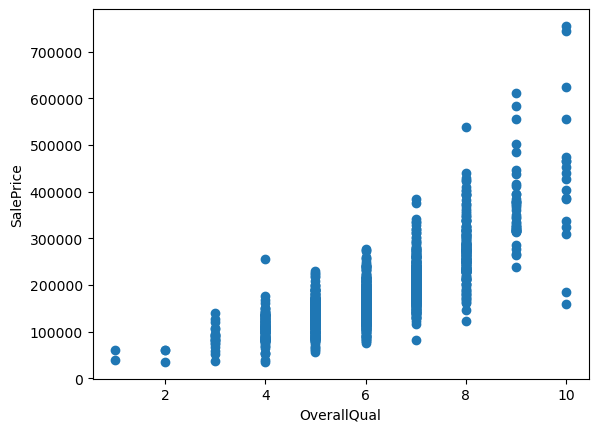

In [40]:
# Scatter plot of OverallQual and SalePrice - can see quality has a pretty good corelation to sale price
plt.scatter(df['OverallQual'], df['SalePrice'])
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')

Text(0, 0.5, 'SalePrice')

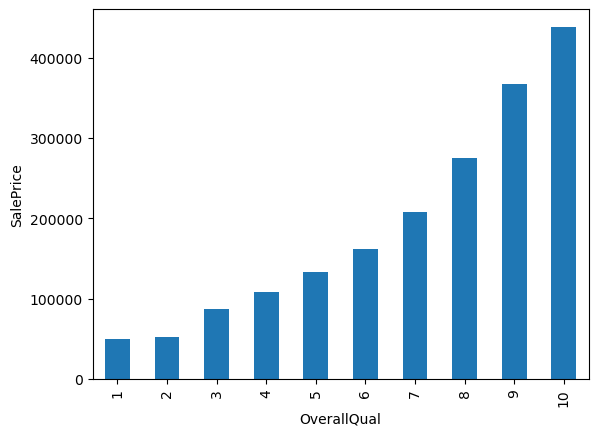

In [41]:
df_grouped_overal = df_num.groupby('OverallQual').agg('mean')
df_grouped_overal["SalePrice"].plot(kind='bar')
#label
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')

Text(0, 0.5, 'LogPrice')

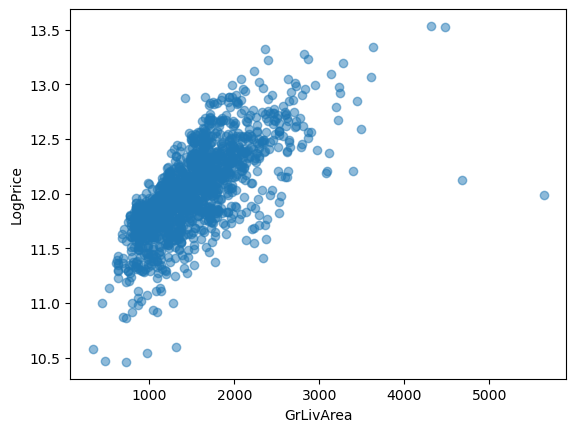

In [42]:
# comparing LogPrice to GrLivArea - a few outliers here
plt.scatter(df['GrLivArea'], df['LogPrice'], alpha=0.5)
plt.xlabel('GrLivArea')
plt.ylabel('LogPrice')

Text(0, 0.5, 'LogPrice')

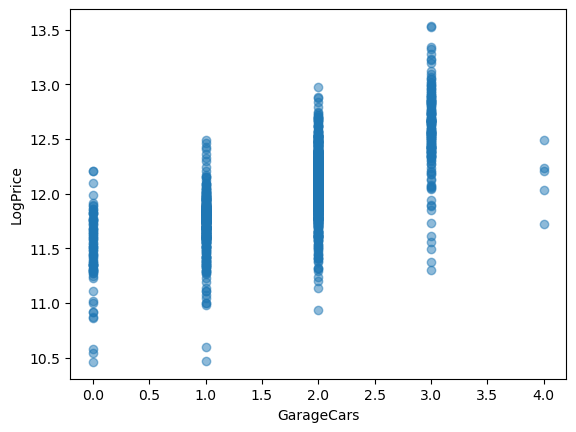

In [43]:
# garage cars - identify outliers
# comparing LogPrice to GrLivArea - a few outliers here
plt.scatter(df['GarageCars'], df['LogPrice'], alpha=0.5)
plt.xlabel('GarageCars')
plt.ylabel('LogPrice')

Text(0, 0.5, 'LogPrice')

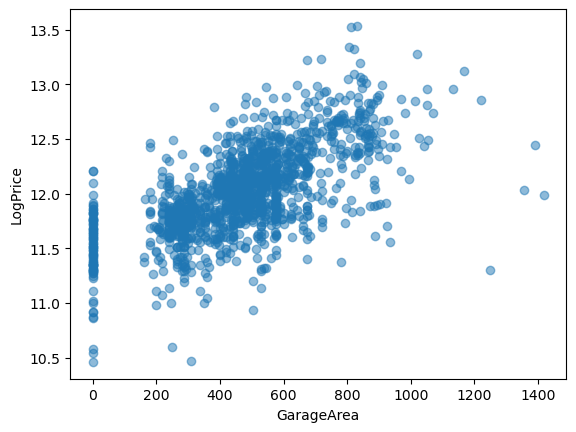

In [44]:
# garage area - identify outliers
# comparing LogPrice to GrLivArea
plt.scatter(df['GarageArea'], df['LogPrice'], alpha=0.5)
plt.xlabel('GarageArea')
plt.ylabel('LogPrice')

In [45]:
# replace any entries with GrLivArea greater than 4000, a GarageArea greater than 1000 and GarageCars greater than 3 with median values

# Convert GarageCars, GarageArea, and GrLivArea to numeric types in df and df_test
df['GarageCars'] = pd.to_numeric(df['GarageCars'], errors='coerce')
df['GarageArea'] = pd.to_numeric(df['GarageArea'], errors='coerce')
df['GrLivArea'] = pd.to_numeric(df['GrLivArea'], errors='coerce')

df_test['GarageCars'] = pd.to_numeric(df_test['GarageCars'], errors='coerce')
df_test['GarageArea'] = pd.to_numeric(df_test['GarageArea'], errors='coerce')
df_test['GrLivArea'] = pd.to_numeric(df_test['GrLivArea'], errors='coerce')

# Fill NA values with 0 for consistency
df[['GarageCars', 'GarageArea', 'GrLivArea']] = df[['GarageCars', 'GarageArea', 'GrLivArea']].fillna(0)
df_test[['GarageCars', 'GarageArea', 'GrLivArea']] = df_test[['GarageCars', 'GarageArea', 'GrLivArea']].fillna(0)

# Replace values above thresholds with the median value of each column
df.loc[df['GarageCars'] > 3, 'GarageCars'] = df['GarageCars'].median()
df.loc[df['GarageArea'] > 1000, 'GarageArea'] = df['GarageArea'].median()
df.loc[df['GrLivArea'] > 4000, 'GrLivArea'] = df['GrLivArea'].median()

df_test.loc[df_test['GarageCars'] > 3, 'GarageCars'] = df_test['GarageCars'].median()
df_test.loc[df_test['GarageArea'] > 1000, 'GarageArea'] = df_test['GarageArea'].median()
df_test.loc[df_test['GrLivArea'] > 4000, 'GrLivArea'] = df_test['GrLivArea'].median()

Text(0, 0.5, 'LogPrice')

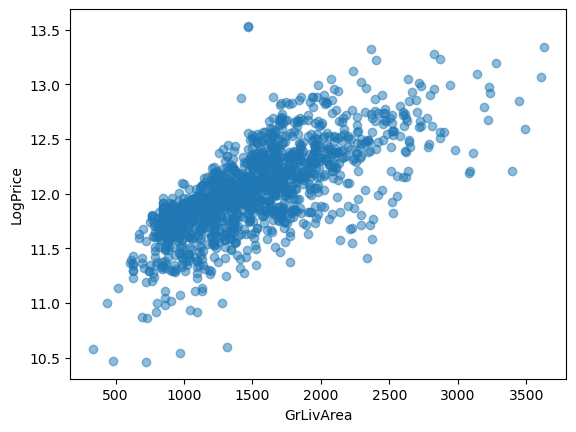

In [46]:
# Check graphs again to ensure removal of outliers
plt.scatter(df['GrLivArea'], df['LogPrice'], alpha=0.5)
plt.xlabel('GrLivArea')
plt.ylabel('LogPrice')

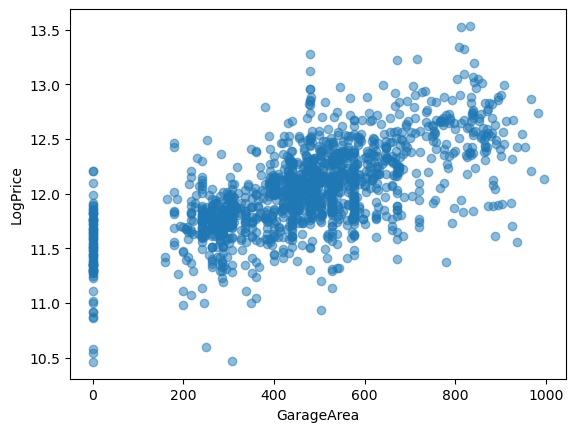

In [47]:
# Check graphs again to ensure removal of outliers
plt.scatter(df['GarageArea'], df['LogPrice'], alpha=0.5)
plt.xlabel('GarageArea')
plt.ylabel('LogPrice')
plt.show()

Text(0, 0.5, 'LogPrice')

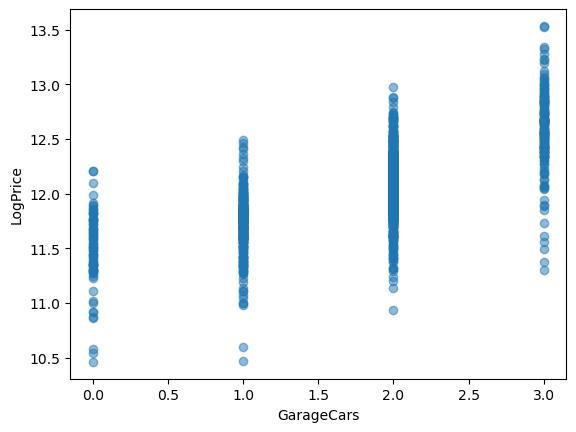

In [48]:
plt.scatter(df['GarageCars'], df['LogPrice'], alpha=0.5)
plt.xlabel('GarageCars')
plt.ylabel('LogPrice')

Text(0, 0.5, 'SalePrice')

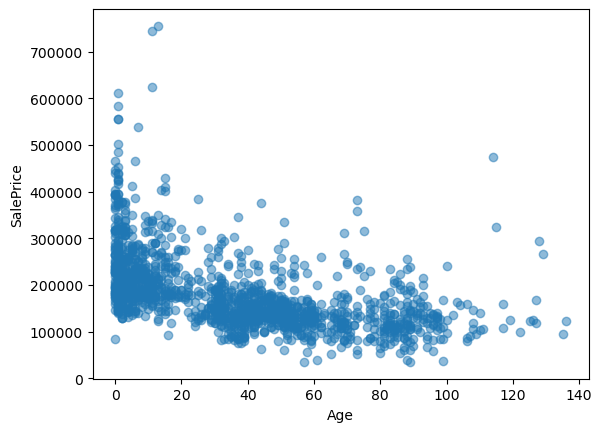

In [49]:
# sale price vs age
plt.scatter(df['Age'], df['SalePrice'], alpha=0.5)
plt.xlabel('Age')
plt.ylabel('SalePrice')

In [50]:
# get the unique values in KitchenQual - going to convert this into more useful data ie. a number
df.KitchenQual.unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [51]:
# same thing for df_test
df_test.KitchenQual.unique()

array(['TA', 'Gd', 'Ex', 'Fa', 'NA'], dtype=object)

In [52]:
quals = ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA']
quals.reverse()
quals

['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']

In [53]:
# Convert the string values into numeric values using a loop and set each category to a number
kq = [quals.index(q) for q in df.KitchenQual]
df['KitchenQualNum'] = kq 
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,Age,GarageAge,LogPrice,KitchenQualNum
0,1,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,...,NA,0,2,WD,Normal,208500,5,21.0,12.247694,4
1,2,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,...,NA,0,5,WD,Normal,181500,31,48.0,12.109011,3
2,3,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,...,NA,0,9,WD,Normal,223500,7,23.0,12.317167,4
3,4,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,...,NA,0,2,WD,Abnorml,140000,91,26.0,11.849398,4
4,5,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,...,NA,0,12,WD,Normal,250000,8,24.0,12.429216,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NA,Reg,Lvl,AllPub,...,NA,0,8,WD,Normal,175000,8,25.0,12.072541,3
1456,1457,20,RL,85.0,13175,Pave,NA,Reg,Lvl,AllPub,...,NA,0,2,WD,Normal,210000,32,46.0,12.254863,3
1457,1458,70,RL,66.0,9042,Pave,NA,Reg,Lvl,AllPub,...,Shed,2500,5,WD,Normal,266500,69,83.0,12.493130,4
1458,1459,20,RL,68.0,9717,Pave,NA,Reg,Lvl,AllPub,...,NA,0,4,WD,Normal,142125,60,74.0,11.864462,4


In [54]:
# same thing for df_test
kq_test = [quals.index(q) for q in df_test.KitchenQual]
df_test['KitchenQualNum'] = kq_test
df_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,Age,GarageAge,KitchenQualNum
0,1461,20,RH,65.0,11622,Pave,NA,Reg,Lvl,AllPub,...,NA,MnPrv,NA,0,6,WD,Normal,49,63.0,3
1,1462,20,RL,80.0,14267,Pave,NA,IR1,Lvl,AllPub,...,NA,NA,Gar2,12500,6,WD,Normal,52,66.0,4
2,1463,60,RL,68.0,13830,Pave,NA,IR1,Lvl,AllPub,...,NA,MnPrv,NA,0,3,WD,Normal,13,27.0,3
3,1464,60,RL,60.0,9978,Pave,NA,IR1,Lvl,AllPub,...,NA,NA,NA,0,6,WD,Normal,12,26.0,4
4,1465,120,RL,84.0,5005,Pave,NA,IR1,HLS,AllPub,...,NA,NA,NA,0,1,WD,Normal,18,32.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,62.0,1936,Pave,NA,Reg,Lvl,AllPub,...,NA,NA,NA,0,6,WD,Normal,36,0.0,3
1455,2916,160,RM,62.0,1894,Pave,NA,Reg,Lvl,AllPub,...,NA,NA,NA,0,4,WD,Abnorml,36,54.0,3
1456,2917,20,RL,85.0,20000,Pave,NA,Reg,Lvl,AllPub,...,NA,NA,NA,0,9,WD,Abnorml,46,64.0,3
1457,2918,85,RL,66.0,10441,Pave,NA,Reg,Lvl,AllPub,...,NA,MnPrv,Shed,700,7,WD,Normal,14,0.0,3


In [55]:
# get the quality number counts and plot them
df_test['KitchenQualNum'].value_counts()

KitchenQualNum
3    757
4    565
5    105
2     31
0      1
Name: count, dtype: int64

(array([  0.,  39., 735., 586., 100.]),
 array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 <BarContainer object of 5 artists>)

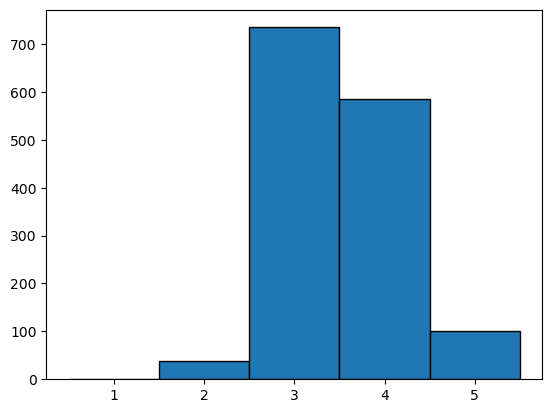

In [56]:
plt.hist(df.KitchenQualNum, bins=np.arange(0.5, 6.5, 1), edgecolor='black')

Text(0, 0.5, 'LogPrice')

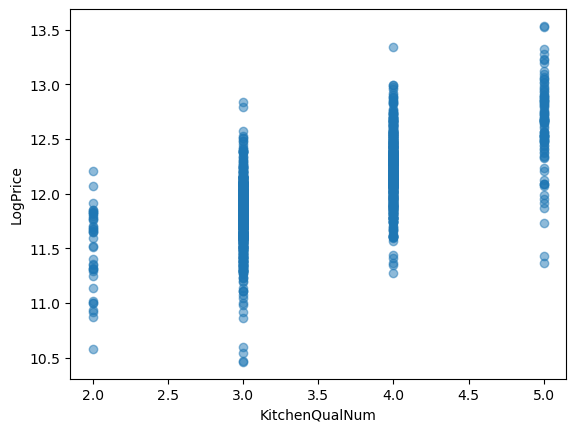

In [57]:
plt.scatter(df['KitchenQualNum'], df['LogPrice'], alpha=0.5)
plt.xlabel('KitchenQualNum')
plt.ylabel('LogPrice')

In [58]:
# drop any deemed not useful - pools, fence etc
# calculate which columns have more than 80% consisting of NA values

In [59]:
# function to calculate the percentage of NA strings in each column
def calculate_na_percentage(df, na_value='NA'):
    na_counts = (df == na_value).sum()  # count occurrences of 'NA' strings
    na_percentage = na_counts / df.shape[0]  # divide by total rows to get percentage
    return na_percentage

# calculate the percentage of NA values in each column for df and df_test
df_na_percentage = calculate_na_percentage(df)
df_test_na_percentage = calculate_na_percentage(df_test)

print("Columns in df with >80% 'NA' values:\n", df_na_percentage[df_na_percentage > 0.80])
print("Columns in df_test with >80% 'NA' values:\n", df_test_na_percentage[df_test_na_percentage > 0.80])

Columns in df with >80% 'NA' values:
 Alley          0.937671
PoolQC         0.995205
Fence          0.807534
MiscFeature    0.963014
dtype: float64
Columns in df_test with >80% 'NA' values:
 Alley          0.926662
PoolQC         0.997944
Fence          0.801234
MiscFeature    0.965045
dtype: float64


In [60]:
# Drop columns with more than 80% 'NA' values from df and df_test
df = df.drop(df_na_percentage[df_na_percentage > 0.80].index, axis=1)
df_test = df_test.drop(df_test_na_percentage[df_test_na_percentage > 0.80].index, axis=1)

In [61]:
# the above section is what helped me go from 0.4 to 0.17
# 6th submission - super exciting to finally crack below 0.3

In [62]:
# 3) MODEL BUILDING AND TRAINING


In [63]:
# Fit
fit_col = ['OverallQual', 'GrLivArea', 'GarageArea', 'Age', 'KitchenQualNum']

In [64]:
# Define X_train, y_train, and X_test
X = df[fit_col]
y = df['LogPrice']
X_test = df_test[fit_col]

In [65]:
# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [66]:
# Initialize and train the model on the training set
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [67]:
# Predict on validation set and calculate RMSE for evaluation
y_val_pred = model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
print(f"Validation RMSE: {rmse}")

Validation RMSE: 0.1717494585781366


In [68]:
# make predictions 
log_price_predictions = model.predict(X_test)
price_predictions = np.expm1(log_price_predictions)

In [69]:
# Prepare submission file
submission = pd.DataFrame({
    'Id': df_test['Id'],
    'SalePrice': price_predictions
})
submission.to_csv('submission.csv', index=False)